In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [4]:
def create_autoencoder():
    # Encoder
    input_img = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    return autoencoder

autoencoder = create_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - loss: 0.2375 - val_loss: 0.0779
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 0.0765 - val_loss: 0.0723
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0727 - val_loss: 0.0705
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0710 - val_loss: 0.0693
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0698 - val_loss: 0.0685
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0691 - val_loss: 0.0679
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0683 - val_loss: 0.0677
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0678 - val_loss: 0.0671
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0674 - val_loss: 0.0665
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0668 - val_loss: 0.0661
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0665 - val_loss: 0.0659
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━

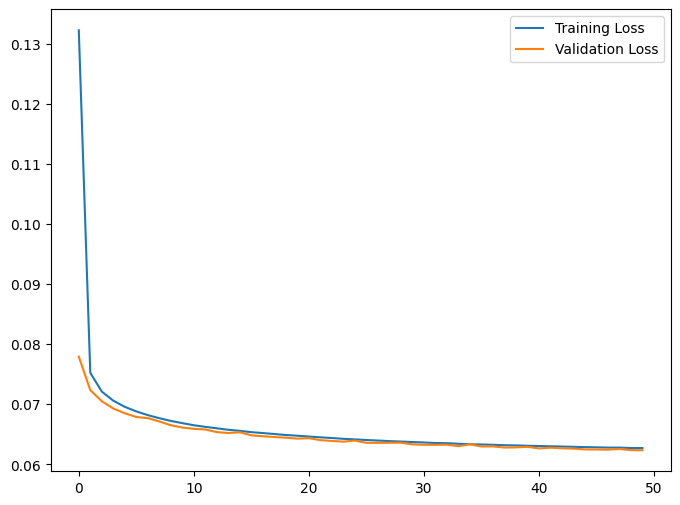

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


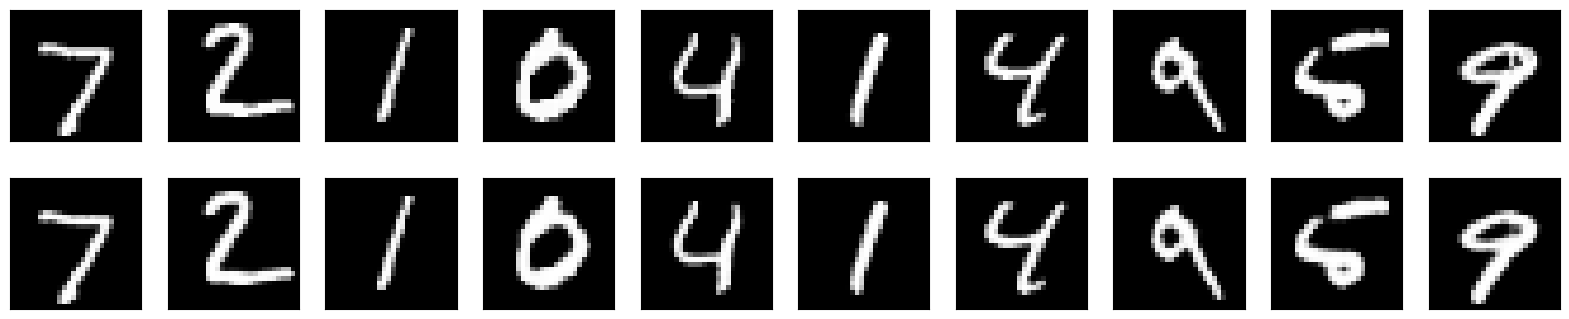

In [7]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()